# Sessie 05 - Continue Kansverdelingen - Oplossing

Reken met kansen en kansverdelingen wordt toegepast in alle domeinen van ons leven, gaande van het uitrekenen van risico’s, het voorspellen van het weer, inschatten van de impact van een reclamecampagne op de omzetcijfers van een bedrijf, modelleren van de verspreiding van een (computer) virus, etc.

De normaalverdeling is de meest gekende en gebruikte kansverdeling in de statistiek. Het is een continue klokvormige kansverdeling die symmetrisch verloopt rond het gemiddelde . Ze is hoog in het midden, en wordt naar lage en hoge waarden steeds kleiner zonder ooit echt nul te worden.
De bedoeling van deze opdracht is om vlot overweg te kunnen met deze kansverdelingen bij het uitrekenen van kansen en het kunnen bepalen van de verwachte waarden van kansverdelingen.

## Inhoud
    • Kunnen nagaan of een reeks gegevens al dan niet normaal verdeeld zijn.
    • Rekenen met en interpreteren van de normaalverdeling.
    • Kunnen uitrekenen van kansen bij normaalverdeelde data
    

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

## Vraag 1
Bereken onderstaande kansen met behulp van Python.

In [27]:
# P(Z < -1,67) - standaardnormaalverdeling met gemiddelde 0 en standaardafwijking 1
stats.norm.cdf(-1.67,0,1)

0.04745968180294733

In [28]:
# P(Z > 2,56 ) - standaardnormaalverdeling met gemiddelde 0 en standaardafwijking 1
stats.norm.sf(2.56,0,1)

0.0052336081635557825

In [29]:
# P(1,34 < Z < 2,34) - standaardnormaalverdeling met gemiddelde 0 en standaardafwijking 1
stats.norm.cdf(2.34,0,1) - stats.norm.cdf(1.34,0,1)

0.08048080251909406

In [30]:
# X~N(50;5)   P(X<60) -normaalverdeling met gemiddelde 50 en standaardafwijking 5
stats.norm.cdf(60,50,5)

0.9772498680518208

In [31]:
# X~N(5;1)   P(X > 2,5) -normaalverdeling met gemiddelde 5 en standaardafwijking 1
stats.norm.sf(2.5,5,1)

0.9937903346742238

In [32]:
# X~N(120;6)   P(114 < X < 126) - normaalverdeling met gemiddelde 120 en standaardafwijking 6
stats.norm.cdf(126,120,6) - stats.norm.cdf(114,120,6)

0.6826894921370859

## Vraag 2

De batterij van de fitbit charge 2 heeft een MTTF (Mean Time To Failure = gemiddelde levensduur) van een bepaald type omvormer bedraagt 24 maanden een standaardafwijking van 6 maanden.
De garantieperiode op een fitbit charge 2 is 1 jaar (12 maanden).


a. Wat is de kans dat een fitbit binnen de garantieperiode stuk gaat?

In [33]:
stats.norm.cdf(12,24,6)

0.022750131948179195

b. Stel dat na 2,5 jaar een koper beslist om de fitbit charge 3 te kopen, wat is de kans dat de fitbit charge 2 niet binnen deze periode kapot gaat?
    

In [34]:
stats.norm.sf(30,24,6)

0.15865525393145707

c. Wat is de kans dat de fitbit charge 2 kapot gaat tussen de 1 jaar en de 2,5 jaar en je dus niet op de garantie kunt terugvallen?

In [35]:
stats.norm.cdf(30,24,6)-stats.norm.cdf(12,24,6)

0.8185946141203637

d. Na hoeveel maand moet je de batterij vervangen om ervoor te zorgen dat je minder dan 10% kans hebt dat je met een kapotte fitbit komt te zitten?

In [36]:
stats.norm.isf(0.90,24,6)

16.310690606732397

## Vraag 3

Aan een toelatingsexamen nemen 300 kandidaten deel voor 50 plaatsen. De uitslag is normaal verdeeld. De gemiddelde uitslag bedraagt 65% en de standaardafwijking is 10%. 

a. Welk percentage is vereist om aangenomen te worden indien men de 50 besten aanwerft ?

In [37]:
stats.norm.isf(1/6,65,10)

74.67421566101702

b. Ann haalt 58 en Joachim 75. Hoeveel kandidaten komen er in de rangschikking tussen Ann en Joachim?

In [38]:
(stats.norm.cdf(75,65,10)-stats.norm.cdf(58,65,10)) * 300

179.81432815364096

## Vraag 4

De BMI is een index die de verhouding tussen lengte en gewicht bij een persoon weergeeft. De BMI wordt veel gebruikt om een indicatie te krijgen of er sprake is van overgewicht of ondergewicht.
Om de BMI van een persoon te berekenen deel je zijn/haar gewicht door het kwadraat van de lengte. Het gewicht wordt daarbij uitgedrukt in kilogram, de lengte in meter.
Weegt een persoon bijvoorbeeld 67kg en meet deze persoon 172cm, dan is de BMI gelijk aan:
$\frac{67}{1,72^2}=22,65$

Alhoewel de BMI niet altijd even betrouwbaar is hanteert men volgende tabel om de BMI te interpreteren.

| BMI | Interpretatie |
   ----------------  |  ------------- 
| 18,5 tot en met 25 | Normaal gewicht |
| 25 tot en met 27 | Licht overgewicht |
| 27 tot en met 30 | Matig overgewicht |
| 30 tot en met 40 | Ernstig overgewicht |
| Meer dan 40      | Ziekelijk overgewicht

Het bestand BMI.csv bevat lengtes en gewichten van personen die tijdens een steekproef werden opgemeten.

a. Teken een histogram van alle BMI waarden en ga na of deze normaal verdeeld zijn. Bepaal daarvoor het gemiddelde en de standaardafwijking. Teken nu bovenop het histogram de theoretische normaalverdeling die overeen komt met het bekomen gemiddelde en de standaardafwijking. Ga ook na of ongeveer 68% van de BMI waarden binnen 1 standaardafwijking van het gemiddelde liggen en ongeveer 95 procent van de BMI waarden binnen de 2 standaardafwijkingen van het gemiddelde.
    
b. Herhaal het gevraagde onder vraag b, maar splits op in mannen en vrouwen. Op deze manier kunnen we straks per geslacht aparte conclusies trekken.
    
c. Is er een groot verschil tussen de distributie van het BMI van mannen en deze van vrouwen?

d. Hoeveel procent van demannen in de df heeft minstens ernstig overgewicht en hoeveel procent vrouwen in de dataset?

e. Hoeveel procent van de populatie (niet de steekproef) mannen heeft minstens te maken met een ernstig overgewicht? En hoeveel procent van de vrouwen?
    
f. Hoeveel procent van de populatie (niet de steekproef) mannen heeft een ondergewicht? En hoeveel procent van de vrouwen? Veronderstel dat de steekproef representatief is voor de populatie.
    
g. Ga na of er uitschieters in de dataset aanwezig zijn. Uitschieters kan je hier beschouwen als de BMI gewichten die meer dan 3 standaardafwijkingen van het gemiddelde liggen.

In [39]:
# Inlezen van de dataset
dataset = pd.read_csv('BMI_data_bewerkt.csv')
dataset.head()

,Sex,Age,BMI,Height_m,Weight_kg
0,Female,21,24.2,1.670812,67.652988
1,Female,35,24.8,1.816608,81.723660
2,Female,27,29.5,1.762760,91.627019
3,Male,24,28.4,1.732788,85.226360
4,Female,18,29.1,1.721866,86.399914


In [40]:
def histogram(data,x,y='',title=''):
    if y=='':         
        sns.histplot(data=data, x=x)
        title = f'Graafiek van {x}'
        plt.title(title)
        plt.show()
        pass
    else:
        sns.histplot(data=data, x=x, y=y)
        title = f'Graafiek van {x} en {y}'
        plt.title(title)
        plt.show()
        pass

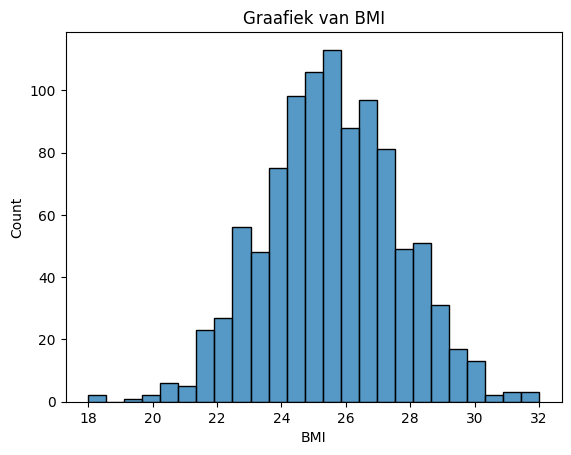

In [41]:
# a. Teken een histogram van alle verkopen en ga na of deze normaal verdeeld zijn.
histogram(dataset,'BMI')


0.6883910386965377
0.66600790513834


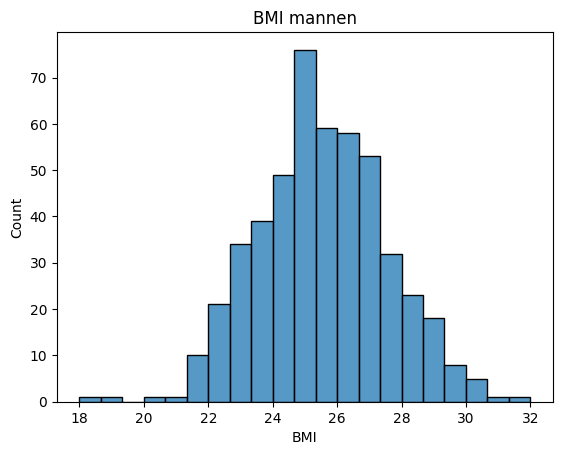

Text(0.5, 1.0, 'BMI vrouwen')

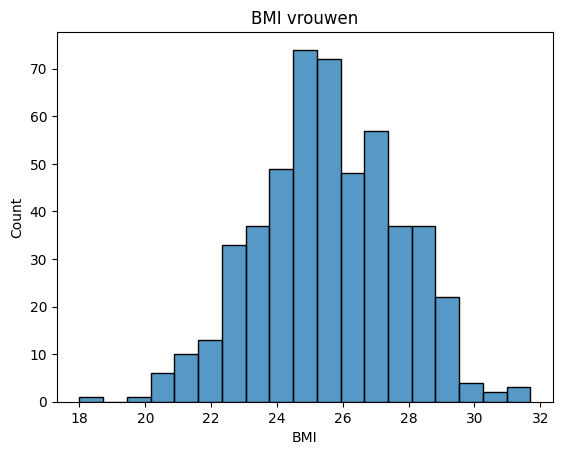

In [42]:
# b. Herhaal het gevraagde onder vraag b, maar splits op in mannen en vrouwen.. 
man = dataset['Sex']=="Male"
vrouw = dataset['Sex']=="Female"

totaal_mannen = dataset[man]['BMI'].count()
totaal_vrouwen = dataset[vrouw]['BMI'].count()

avg_man = dataset[man]['BMI'].mean()
stdev_man = dataset[man]['BMI'].std()

avg_vrouw = dataset[vrouw]['BMI'].mean()
stdev_vrouw = dataset[vrouw]['BMI'].std()

test = dataset[(dataset['Sex']=='Male')&(dataset['BMI']>avg_man-stdev_man) & (dataset['BMI']<avg_man+stdev_man)]['BMI'].count()
print(test/totaal_mannen)

test = dataset[(dataset['Sex']=='Female')&(dataset['BMI']>avg_vrouw-stdev_vrouw) & (dataset['BMI']<avg_vrouw+stdev_vrouw)]['BMI'].count()
print(test/totaal_vrouwen)

sns.histplot(x=dataset[dataset['Sex']=="Male"]['BMI'])
plt.title('BMI mannen')
plt.show()

sns.histplot(x=dataset[dataset['Sex']=="Female"]['BMI'])
plt.title('BMI vrouwen')


In [43]:
# c. Is er een groot verschil tussen de distributie van het BMI van mannen en deze van vrouwenen? Verklaar ...
# nee want deze zijn biede dicht bij de normaal verdeling

In [44]:
# d. Hoeveel procent van de mannen in de dataset heeft minstens ernstig overgewicht en hoeveel procent vrouwen in de dataset?
#30 - 40
x = dataset[(dataset['Sex']=='Male') &(dataset['BMI']>=30)]['BMI'].count()
y = dataset[(dataset['Sex']=='Female') &(dataset['BMI']>=30)]['BMI'].count()
print(f'mannen: {x/totaal_mannen}')
print(totaal_mannen)
print(f'vrouwen: {y/totaal_vrouwen}')

mannen: 0.014256619144602852
491
vrouwen: 0.011857707509881422


In [45]:
# e. Hoeveel procent van de populatie (niet de steekproef) mannen heeft minstens te maken met 
#    een ernstig overgewicht? En hoeveel procent van de vrouwen?
# 30 - 40
print(stats.norm.sf(30,avg_man,stdev_man))

stats.norm.sf(30,avg_vrouw,stdev_vrouw)

0.01279469338288128


0.019727654931796967

In [46]:
# f. Hoeveel procent van de populatie (niet de steekproef) mannen heeft een ondergewicht? 
#    En hoeveel procent van de vrouwen? Veronderstel dat de steekproef representatief is voor de populatie. <18,5

print(stats.norm.cdf(18.5,avg_man,stdev_man))

print(stats.norm.cdf(18.5,avg_vrouw,stdev_vrouw))


0.0002222728577422753
0.0005391047761283534


In [47]:
# g. Ga na of er uitschieters in de dataset aanwezig zijn. 
#    Uitschieters kan je hier beschouwen als de BMI gewichten die meer dan 3 standaardafwijkingen
#    van het gemiddelde liggen. 

u_man = dataset[(dataset['Sex']=='Male') & ((dataset['BMI']< (avg_man - 3*stdev_man)))]['BMI'].count() + dataset[(dataset['Sex']=='Male') & ((dataset['BMI']> (avg_man + 3*stdev_man)))]['BMI'].count() 
print(u_man)

u_vrouw = dataset[(dataset['Sex']=='Female') & ((dataset['BMI']< (avg_man - 3*stdev_man)))]['BMI'].count() + dataset[(dataset['Sex']=='Female') & ((dataset['BMI']> (avg_man + 3*stdev_man)))]['BMI'].count() 
u_vrouw

3


2

## Vraag 5
Een kledingfabrikant wil een nieuwe riem op de markt brengen. Er is een variant voor Malenen en een variant voor Femaleen. Elke variant komt in smal, medium en large.
Elk soort riem is qua lengte als volgt verstelbaar:


|      Variant       | Mannen| Vrouwen |
|------------|-----|---------------|
| Smal |  Van 75 cm tot 87 cm|  Van 73 cm tot 85 cm|
| Medium | Van 85 cm tot 100 cm| Van 80 cm tot 95 cm|
| Large | Van 97 cm tot 110 cm  | Van 90 cm tot 107 cm|


Om een inschatting te kunnen maken van de productieaantallen laat de fabrikant een onderzoek uitvoeren naar de heupomtrek bij Malenen en Femaleen. De gegevens kan je terugvinden onder het bestand 'riemen.csv'.


In [55]:
df = pd.read_csv('riemen.csv')
df.head()

,Heupomtrek,Geslacht
0,93.5,M
1,94.8,M
2,95.0,M
3,94.0,M
4,98.5,M


a. Ga na of deze data normaalverdeeld is. Doe dit door de kansverdeling te plotten en door na te gaan hoeveel procent van de gegevens binnen de 1, 2 en 3 standaardafwijkingen is gelegen. Vergelijk met de werkelijke normaalverdeling die hoort bij het berekende gemiddelde en standaardafwijking.  Doe de analyse ook apart voor mannen en vrouwen.

In [57]:
man = df['Geslacht']=="M"
vrouw = df['Geslacht']=="V"

totaal_mannen = df[man]['Heupomtrek'].count()
totaal_vrouwen = df[vrouw]['Heupomtrek'].count()

avg_man = df[(df['Geslacht']=='M')]['Heupomtrek'].mean()
stdev_man = df[(df['Geslacht']=='M')]['Heupomtrek'].std()

avg_vrouw = df[(df['Geslacht']=='V')]['Heupomtrek'].mean()
stdev_vrouw = df[(df['Geslacht']=='V')]['Heupomtrek'].std()

test = df[(df['Geslacht']=='M')&(df['Heupomtrek']>avg_man-stdev_man) & (df['Heupomtrek']<avg_man+stdev_man)]['Heupomtrek'].count()
print(test/totaal_mannen)

test = df[(df['Geslacht']=='V')&(df['Heupomtrek']>avg_vrouw-stdev_vrouw) & (df['Heupomtrek']<avg_vrouw+stdev_vrouw)]['Heupomtrek'].count()
print(test/totaal_vrouwen)

test = df[(df['Geslacht']=='M')&(df['Heupomtrek']>avg_man-2*stdev_man) & (df['Heupomtrek']<avg_man+2*stdev_man)]['Heupomtrek'].count()
print(test/totaal_mannen)

test = df[(df['Geslacht']=='V')&(df['Heupomtrek']>avg_vrouw-2*stdev_vrouw) & (df['Heupomtrek']<avg_vrouw+2*stdev_vrouw)]['Heupomtrek'].count()
print(test/totaal_vrouwen)

test = df[(df['Geslacht']=='M')&(df['Heupomtrek']>avg_man-3*stdev_man) & (df['Heupomtrek']<avg_man+3*stdev_man)]['Heupomtrek'].count()
print(test/totaal_mannen)

test = df[(df['Geslacht']=='V')&(df['Heupomtrek']>avg_vrouw-3*stdev_vrouw) & (df['Heupomtrek']<avg_vrouw+3*stdev_vrouw)]['Heupomtrek'].count()
print(test/totaal_vrouwen)

0.7004048582995951
0.6884615384615385
0.9635627530364372
0.9538461538461539
0.9919028340080972
0.9961538461538462


b. Vergelijk de maten van de mannen en de vrouwen in termen van gemiddelde en spreiding.

Text(0.5, 1.0, 'Boxplot Heupomtrek')

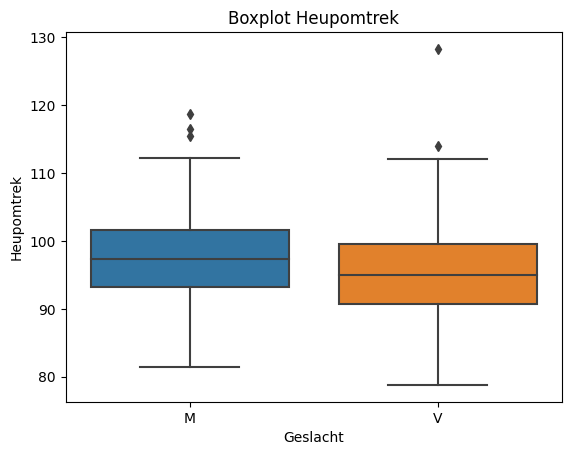

In [52]:
sns.boxplot(data=df, y='Heupomtrek',x='Geslacht')
plt.title('Boxplot Heupomtrek')

c. In de veronderstelling dat de data normaalverdeeld is, bereken telkens **voor de populatie** hoeveel procent van de mannen maat smal, medium en large kan dragen. Doe dit ook voor Vrouwen. Vul daarbij onderstaande tabel aan.

|       Variant     | Mannen| Vrouwen |
|------------|-----:|---------------:|
| Smal |     %|     %|
| Medium |     %|     %|
| Large |      %|     %|
| Smal |  Van 75 cm tot 87 cm|  Van 73 cm tot 85 cm|
| Medium | Van 85 cm tot 100 cm| Van 80 cm tot 95 cm|
| Large | Van 97 cm tot 110 cm  | Van 90 cm tot 107 cm|

In [53]:
stats.norm.cdf(87,avg_man,stdev_man) - stats.norm.cdf(75,avg_man,stdev_man)

0.041849660853105916

d. Bij hoeveel procent van de mannen past zowel smal als medium?

In [54]:
stats.norm.cdf(100,avg_man,stdev_man) - stats.norm.cdf(75,avg_man,stdev_man)

0.640132380000882

e. Bij hoeveel procent van de vrouwen past zowel medium als large?

In [56]:
stats.norm.cdf(107,avg_vrouw,stdev_vrouw) - stats.norm.cdf(80,avg_vrouw,stdev_vrouw)

0.9369031132359786

f. Bij hoeveel procent van de mannen past geen enkele maat?

In [57]:
stats.norm.cdf(75,avg_man,stdev_man) + stats.norm.sf(110,avg_man,stdev_man)

0.02484746280799034

g. Bij hoeveel procent van de vrouwen past geen enkele maat?

In [58]:
stats.norm.cdf(73,avg_vrouw,stdev_vrouw) + stats.norm.sf(107,avg_vrouw,stdev_vrouw)

0.05158610340179882